In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [28]:
data_b_SO2=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/SO2_Data.xlsx",sheet_name='Birmingham')
data_l_SO2=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/SO2_Data.xlsx",sheet_name='London')
data_lp_SO2=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/SO2_Data.xlsx",sheet_name='Liverpool')

In [29]:
df_b_SO2=data_b_SO2[["Year","Site_Name","City","Annual_Mean"]]
df_l_SO2=data_l_SO2[["Year","Site_Name","City","Annual_Mean"]]
df_lp_SO2=data_lp_SO2[["Year","Site_Name","City","Annual_Mean"]]

In [30]:
df_b_SO2=data_b_SO2.groupby('Year').agg(SO2_Birmingham=('Annual_Mean', 'mean')).reset_index()
df_l_SO2=data_l_SO2.groupby('Year').agg(SO2_London=('Annual_Mean', 'mean')).reset_index()
df_lp_SO2=data_lp_SO2.groupby('Year').agg(SO2_Liverpool=('Annual_Mean', 'mean')).reset_index()

In [31]:
B_SO2=df_b_SO2['SO2_Birmingham']
l_SO2=df_l_SO2['SO2_London']
lp_SO2=df_lp_SO2['SO2_Liverpool']

In [45]:
df_lp_SO2

,Year,SO2_Liverpool
0,2000,7.0
1,2001,7.0
2,2002,5.0
3,2003,6.0
4,2004,5.0
5,2005,7.0
6,2006,6.0
7,2007,6.0
8,2008,6.0
9,2009,5.0


In [33]:
print("Maximum of Birmingham",max(B_SO2))
print("Maximum of London",max(l_SO2))
print("Maximum of Liverpool",max(lp_SO2))

Maximum of Birmingham 7.5
Maximum of London 7.636363636363637
Maximum of Liverpool 7.0


In [34]:
print("Minimum of Birmingham",min(B_SO2))
print("Minimum of London",min(l_SO2))
print("Minimum of Liverpool",min(lp_SO2))

Minimum of Birmingham 0.0
Minimum of London 1.3333333333333333
Minimum of Liverpool 2.0


In [35]:
print("SD of Birmingham",B_SO2.std())
print("SD of London",l_SO2.std())
print("SD of Liverpool",lp_SO2.std())

SD of Birmingham 2.1023702039146914
SD of London 1.6448309088804964
SD of Liverpool 1.8944478895773593


In [36]:
print("Variance of Birmingham",B_SO2.var())
print("Variance of London",l_SO2.var())
print("Variance of Liverpool",lp_SO2.var())

Variance of Birmingham 4.419960474308302
Variance of London 2.70546871880864
Variance of Liverpool 3.588932806324111


In [37]:
print("Mean of Birmingham",B_SO2.mean())
print("Mean of London",l_SO2.mean())
print("Mean of Liverpool",lp_SO2.mean())

Mean of Birmingham 2.5217391304347827
Mean of London 4.100131752305664
Mean of Liverpool 4.043478260869565


In [38]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_SO22, l_SO22, and lp_SO22 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_SO2,
    'London': l_SO2,
    'Liverpool': lp_SO2
})

# Perform one-way ASO2VA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='SO2 Concentration')['SO2 Concentration'],
                                   data.melt(var_name='City', value_name='SO2 Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)
else:
    print("There is SO2 significant difference among the cities.")


F-statistic: 5.162935785115384
p-value: 0.008256222512649887
The means are significantly different among the cities.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Birmingham Liverpool   1.5217 0.0218  0.1855 2.8579   True
Birmingham    London   1.5784 0.0166  0.2422 2.9146   True
 Liverpool    London   0.0567 0.9943 -1.2795 1.3928  False
----------------------------------------------------------


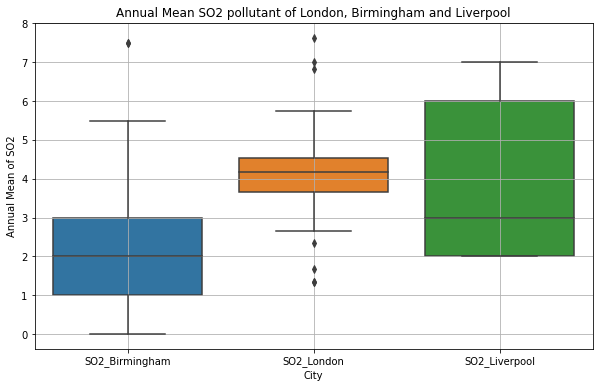

In [39]:
# Combine the data frames
merged_df = df_b_SO2.merge(df_l_SO2, on='Year').merge(df_lp_SO2, on='Year')

# Create a new data frame for Seaborn (melt the data to make it long-form)
melted_df = pd.melt(merged_df, id_vars='Year', var_name='City', value_name='SO2_Concentration')

# Plot box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='SO2_Concentration', data=melted_df)
plt.title('Annual Mean SO2 pollutant of London, Birmingham and Liverpool')
plt.ylabel('Annual Mean of SO2')
plt.xlabel('City')
plt.grid(True)
plt.show()


In [43]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_NO2, l_NO2, and lp_NO2 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_SO2,
    'London': l_SO2,
    'Liverpool': lp_SO2
})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='NO Concentration')['NO Concentration'],
                                   data.melt(var_name='City', value_name='NO Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)

    # Get the increasing order of cities based on their NO2 concentrations
    mean_values = data.mean().sort_values(ascending=False)  # Sort in ascending order
    increasing_order = mean_values.index.tolist()
    print("Increasing order of cities based on SO2 concentrations:")
    print(increasing_order)

else:
    print("There is no significant difference among the cities.")


F-statistic: 5.162935785115384
p-value: 0.008256222512649887
The means are significantly different among the cities.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Birmingham Liverpool   1.5217 0.0218  0.1855 2.8579   True
Birmingham    London   1.5784 0.0166  0.2422 2.9146   True
 Liverpool    London   0.0567 0.9943 -1.2795 1.3928  False
----------------------------------------------------------
Increasing order of cities based on SO2 concentrations:
['London', 'Liverpool', 'Birmingham']
